### Task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


from sklearn.linear_model import LinearRegression

In [2]:
url = ("http://bit.ly/w-data")

In [3]:
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
def data_inv(df):
    print('Total counts of rows:',df.shape[0]) # Total counts of rows
    print('dataset variables: ',df.shape[1])    # gives Total count of column
    print('-'*20)
    print('dataset columns :\n') # All column_Name
    print(df.columns)
    print('-'*20)
    print('data-type of each column: \n') # 
    print(df.dtypes)
    print('-'*20)
    print('Missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])

In [5]:
data_inv(df)

Total counts of rows: 25
dataset variables:  2
--------------------
dataset columns :

Index(['Hours', 'Scores'], dtype='object')
--------------------
data-type of each column: 

Hours     float64
Scores      int64
dtype: object
--------------------
Missing rows in each column: 

Series([], dtype: int64)


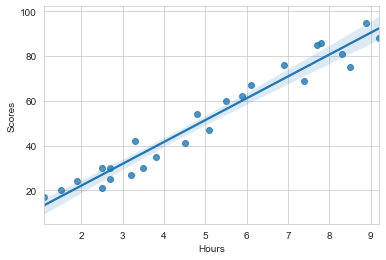

In [6]:
sns.regplot(data=df,x="Hours",y="Scores")
plt.show()

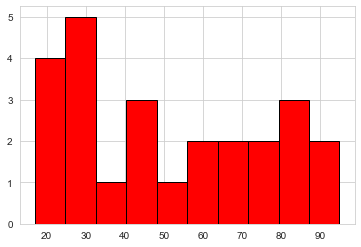

In [7]:
plt.figure()
plt.hist(df["Scores"],bins=10, color='r',edgecolor='black')
plt.show()

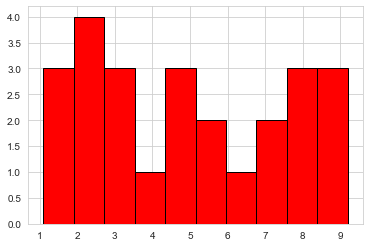

In [8]:
plt.figure()
plt.hist(df["Hours"],bins=10, color='r',edgecolor='black')
plt.show()

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [11]:
lr = LinearRegression()   
lr.fit(X_train,y_train)   
print("intercept",lr.intercept_)
print("slope",lr.coef_)
y_pred=lr.predict(X_test)
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

intercept 2.370815382341881
slope [9.78856669]
MSE 22.96509721270043
R2 0.9568211104435257


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [25]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056
